In [22]:
import cv2

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


In [24]:
matimg = plt.imread("C:\\Users\\james\\OneDrive\\Desktop\\VIT\\Sem III\\Image Processing\\Project\\Virus Dataset\\original-16bit\\class-001-sample-091-16bit.png")
img = cv2.imread("C:\\Users\\james\\OneDrive\\Desktop\\VIT\\Sem III\\Image Processing\\Project\\Virus Dataset\\original-16bit\\class-001-sample-091-16bit.png", cv2.IMREAD_GRAYSCALE)
imag= img = cv2.imread("C:\\Users\\james\\OneDrive\\Desktop\\VIT\\Sem III\\Image Processing\\Project\\Virus Dataset\\original-16bit\\class-001-sample-091-16bit.png", cv2.IMREAD_UNCHANGED)

In [25]:
img.shape

(41, 41)

In [26]:
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(img, 'db1')
LL, (LH, HL, HH) = coeffs2


In [27]:
LL.shape

(21, 21)

In [28]:
width = 41
height = 41
dim = (width, height)
 
# resize image
resized = cv2.resize(LL, dim, interpolation = cv2.INTER_AREA)

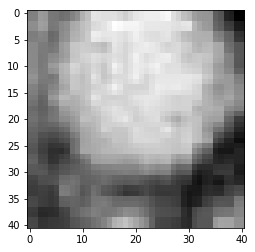

In [30]:
plt.imshow(resized,cmap=plt.cm.gray)

In [ ]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest")
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [1]:
from skimage import feature
import numpy as np

In [3]:
import cv2
img = cv2.imread("C:\\Users\\james\\OneDrive\\Desktop\\VIT\\Sem III\\Image Processing\\Project\\Virus Dataset\\original-16bit\\class-001-sample-091-16bit.png", cv2.IMREAD_GRAYSCALE)

In [12]:
numPoints=4
radius=1
lbp = feature.local_binary_pattern(img,numPoints,radius, method="uniform")
(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
 
# normalize the histogram
#hist = hist.astype("float")
#hist /= (hist.sum())
 
# return the histogram of Local Binary Patterns


In [13]:
type(hist)

numpy.ndarray

In [17]:
print(hist)

[102 363 624 415 115  62]


In [16]:
print(_)

[0 1 2 3 4 5 6]


In [22]:
# compute the color histogram
bins=8
hist  = cv2.calcHist([img], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
# normalize the histogram
cv2.normalize(hist, hist)
# return the histogram
hist = hist.flatten()

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:152: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'
